## Tarea 8 - FIS1344: Agustin Ibarra Sepúlveda.

A partir de la fórmula de tres puntos para la derivada en el extremo, asumiendo que esta tiene un error del tipo

$$
M = N_1(h) + K_1 h^2 + K_2 h^4 + ...
$$

use la extrapolación de Richardson para mejorar la aproximación. Escriba un código usando esta nueva fórmula y compárela con las fórmulas a tres y cinco puntos en los extremos introducidas en clase actuando sobre alguna función sencilla y comparando los errores de las tres.

-------------------------------------------------------------------------------------------------------------------------------

## Desarrollo

Comenzamos de: 

$$
M = N_1(h) + K_1 h^2 + K_2 h^4 + ...
$$

Remplazando h por un un $ \frac{h}{2} $, un error más pequeño.

$$
M = N_1(h/2) + \frac{1}{4} K_1 h^2 + \frac{1}{16} K_2 h^4 + ...
$$

Luego, de usar ambas ecuaciones llegaremos a lo siguiente;

$$
3M = 4N_1(h/2) - N_1(h) - \frac{3}{4} K_2 h^4 + ...
$$

Obteniendo,

$$
N_2(h) = \frac{4N_1(h/2) - N_1(h)}{3}
$$

De esta ya podemos encontrar un tipo de aproximacion que sera de la forma

$$
N_j(h) = N_{j - 1}(h/2) + \frac{N_{j-1}(h/2) - N_{j-1}(h)}{4^{j-1} - 1}
$$

Primero sacaremos las funciones utilizadas y encontradas en clases, para realizar la comparación.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def deriv3p_extremo(f, x, h):
    return (-3*f(x) + 4*f(x + h) - f(x + 2*h))/(2*h)

def deriv5p_extremo(f, x, h):
    return (-25*f(x) + 48*f(x + h) - 36*f(x + 2*h) + 16*f(x + 3*h) - 3*f(x + 4*h))/(12*h)

Escribimos la fórmula que encontramos usando la extrapolación de Richardson en la derivada de 3 puntos. Para esto haremos uso de los arrays, para ir rellenando cada valor que va saliendo al aumentar nuestro h a h/2. Luego usaremos el último resultado de esto para así sacar el valor numérico esperado de la derivada.

In [2]:
def richardson( f, x, n, h ):
    '''
    Función que encuentra la mejor aproximación de la derivada en un
    punto, utilizando la extrapolación de Richardson.

    f- Función que se le encontrará la derivada.

    x- Valor donde queremos conocer la derivada.

    n- Número de extrapolaciones que se harán.

    h- Intervalo inicial
    
    '''
    
    N = np.array([[0]*(n + 1)]*(n + 1), float)
    #Primer array de 0 para asi ir rellenando con los datos.
    #Esto creara una "Matriz" M x M.
    
    for i in range(n + 1):
        N[i,0] = (f(x + h) - f(x - h))/(2*h)
        #Realizamos la derivada de 3 puntos.

        exp4 = 1 
        #Exponente del 4.
        for j in range(1, i + 1):
            exp4 = 4 * exp4
            N[i,j] = N[i,j-1] + (N[i,j-1] - N[i-1,j-1])/(exp4 - 1)
            #Formula encontrada anteriormente. 
        
        h = 0.5 * h
        #Hacemos aumentar el h.

    return N[i,j]

Ahora escribiremos una función sencilla y su derivada, de tal manera que tengamos un resultado numérico sencillo que podamos comparar.

In [3]:
def fun(x):
    return x + np.cos(x)**2 + np.sin(x)*np.cos(x)
def dfun(x):
    return 1 + np.cos(x)**2 - 2*np.cos(x)*np.sin(x) - np.sin(x)**2

Text(0.5, 1.0, 'Funcion f(x)')

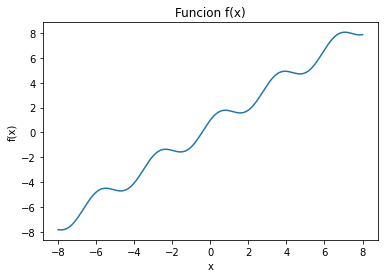

In [4]:
a = np.linspace(-8, 8, 1000)
plt.plot(a, fun(a))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Funcion f(x)')

Ahora utilicemos nuestra función y comparemos el resultado que da, con el valor real la función evaluada en 0, que se utilizó.

In [5]:
richardson(fun, 0, 2, 0.2)

1.9999999873385657

In [6]:
dfun(0)

2.0

In [7]:
(richardson(fun, 0, 2, 0.2) - dfun(0))

-1.2661434345417888e-08

Como se puede da un valor extremadamente preciso, logrando a casi ser 0 en la resta del valor obtenido con el real. Veamos los otros métodos.

In [8]:
deriv3p_extremo(fun, 0, 0.2) - dfun(0)

0.03481818124931646

In [9]:
deriv5p_extremo(fun, 0, 0.2) - dfun(0)

-0.0008386377177775906

Se puede ver que los errores son pequeños, pero no tanto como el que nos da con la extrapolación de Richardson. Esto nos indica que el método, con el que vamos sacando y volviendo h mucho más pequeño, nos hace un código mucho más preciso dentro de cierto rango.

## Calificacion: 7.0